In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from pandas.plotting import scatter_matrix

###Data Preprocessing
cp = pd.read_csv("data.csv")
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.1+ MB


In [2]:
cp.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
cp['Transmission Type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission Type, dtype: int64

In [4]:
#Remove the rows that contain 'UNKNOWN'
cp = cp[cp['Transmission Type'] != 'UNKNOWN']
cp['Transmission Type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
Name: Transmission Type, dtype: int64

In [5]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11895 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11895 non-null object
Model                11895 non-null object
Year                 11895 non-null int64
Engine Fuel Type     11892 non-null object
Engine HP            11826 non-null float64
Engine Cylinders     11865 non-null float64
Transmission Type    11895 non-null object
Driven_Wheels        11895 non-null object
Number of Doors      11889 non-null float64
Market Category      8169 non-null object
Vehicle Size         11895 non-null object
Vehicle Style        11895 non-null object
highway MPG          11895 non-null int64
city mpg             11895 non-null int64
Popularity           11895 non-null int64
MSRP                 11895 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.2+ MB


In [6]:
###Converting Transmission Type to numeric value
cp = cp.replace({'AUTOMATIC':'2'})
cp = cp.replace({'MANUAL':'1'})
cp = cp.replace({'AUTOMATED_MANUAL':'3'})
cp = cp.replace({'DIRECT_DRIVE':'4'})
cp['Transmission Type'].value_counts()

2    8266
1    2935
3     626
4      68
Name: Transmission Type, dtype: int64

In [7]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11895 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11895 non-null object
Model                11895 non-null object
Year                 11895 non-null int64
Engine Fuel Type     11892 non-null object
Engine HP            11826 non-null float64
Engine Cylinders     11865 non-null float64
Transmission Type    11895 non-null object
Driven_Wheels        11895 non-null object
Number of Doors      11889 non-null float64
Market Category      8169 non-null object
Vehicle Size         11895 non-null object
Vehicle Style        11895 non-null object
highway MPG          11895 non-null int64
city mpg             11895 non-null int64
Popularity           11895 non-null int64
MSRP                 11895 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.2+ MB


In [8]:
###Converting Transmission Type datatype to numeric 
cp["Transmission Type"] = pd.to_numeric(cp["Transmission Type"])
cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11895 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11895 non-null object
Model                11895 non-null object
Year                 11895 non-null int64
Engine Fuel Type     11892 non-null object
Engine HP            11826 non-null float64
Engine Cylinders     11865 non-null float64
Transmission Type    11895 non-null int64
Driven_Wheels        11895 non-null object
Number of Doors      11889 non-null float64
Market Category      8169 non-null object
Vehicle Size         11895 non-null object
Vehicle Style        11895 non-null object
highway MPG          11895 non-null int64
city mpg             11895 non-null int64
Popularity           11895 non-null int64
MSRP                 11895 non-null int64
dtypes: float64(3), int64(6), object(7)
memory usage: 1.2+ MB


In [9]:
###Drop column Popularity and Market Category as Both of them does not really affect MSRP
cp = cp.drop('Popularity',axis=1)
cp = cp.drop('Market Category',axis=1)

###Calculate The age of the car from 2017 since the dataset published in 2017
cp['Age']=2017-cp['Year']
cp.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP,Age
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,1,rear wheel drive,2.0,Compact,Coupe,26,19,46135,6
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,1,rear wheel drive,2.0,Compact,Convertible,28,19,40650,6
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,1,rear wheel drive,2.0,Compact,Coupe,28,20,36350,6
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,1,rear wheel drive,2.0,Compact,Coupe,28,18,29450,6
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,1,rear wheel drive,2.0,Compact,Convertible,28,18,34500,6


In [10]:
##Check null values for Age
cp['Age'].isnull().any()

False

In [11]:
## Removing Duplicates
cp.drop_duplicates(keep=False,inplace=True) 

In [12]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10562 entries, 0 to 11913
Data columns (total 15 columns):
Make                 10562 non-null object
Model                10562 non-null object
Year                 10562 non-null int64
Engine Fuel Type     10559 non-null object
Engine HP            10493 non-null float64
Engine Cylinders     10532 non-null float64
Transmission Type    10562 non-null int64
Driven_Wheels        10562 non-null object
Number of Doors      10556 non-null float64
Vehicle Size         10562 non-null object
Vehicle Style        10562 non-null object
highway MPG          10562 non-null int64
city mpg             10562 non-null int64
MSRP                 10562 non-null int64
Age                  10562 non-null int64
dtypes: float64(3), int64(6), object(6)
memory usage: 1.0+ MB


In [13]:
###Checking Unique values
cp['Make'].describe()

count         10562
unique           48
top       Chevrolet
freq           1051
Name: Make, dtype: object

In [14]:
cp['Model'].describe()

count              10562
unique               897
top       Silverado 1500
freq                 156
Name: Model, dtype: object

In [15]:
cp['Engine Fuel Type'].describe()

count                10559
unique                  10
top       regular unleaded
freq                  6214
Name: Engine Fuel Type, dtype: object

In [16]:
cp['Driven_Wheels'].unique()

array(['rear wheel drive', 'all wheel drive', 'front wheel drive',
       'four wheel drive'], dtype=object)

In [17]:
###Converting Driven_Wheels to numeric value
cp = cp.replace({'rear wheel drive':'1'})
cp = cp.replace({'all wheel drive':'3'})
cp = cp.replace({'front wheel drive':'2'})
cp = cp.replace({'four wheel drive':'3'})
cp["Driven_Wheels"] = pd.to_numeric(cp["Driven_Wheels"])
cp['Driven_Wheels'].value_counts()

2    3935
3    3535
1    3092
Name: Driven_Wheels, dtype: int64

In [18]:
cp['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [19]:
###Converting Engine Fuel Type to numeric
cp = cp.replace({'premium unleaded (required)':'1'})
cp = cp.replace({'regular unleaded':'2'})
cp = cp.replace({'premium unleaded (recommended)':'3'})
cp = cp.replace({'flex-fuel (unleaded/E85)':'4'})
cp = cp.replace({'diesel':'5'})
cp = cp.replace({'electric':'6'})
cp = cp.replace({'flex-fuel (premium unleaded recommended/E85)':'7'})
cp = cp.replace({'natural gas':'8'})
cp = cp.replace({'flex-fuel (premium unleaded required/E85)':'9'})
cp = cp.replace({'flex-fuel (unleaded/natural gas)':'10'})
cp["Engine Fuel Type"] = pd.to_numeric(cp["Engine Fuel Type"])
cp['Engine Fuel Type'].value_counts()

2.0     6214
1.0     1905
3.0     1267
4.0      875
5.0      146
6.0       66
9.0       52
7.0       26
10.0       6
8.0        2
Name: Engine Fuel Type, dtype: int64

In [20]:
##check null values
cp['Engine Fuel Type'].isnull().any()

True

In [21]:
##Drop null values
cp=cp.dropna()
cp['Engine Fuel Type'].isnull().any()

False

In [22]:
cp['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [23]:
###Converting Vehicle Size to numeric
cp = cp.replace({'Compact':'1'})
cp = cp.replace({'Midsize':'2'})
cp = cp.replace({'Large':'3'})
cp["Vehicle Size"] = pd.to_numeric(cp["Vehicle Size"])
cp['Vehicle Size'].value_counts()

1    3998
2    3869
3    2593
Name: Vehicle Size, dtype: int64

In [24]:
cp['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Wagon', 'Sedan', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [25]:
cp.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP,Age
0,BMW,1 Series M,2011,1.0,335.0,6.0,1,1,2.0,1,Coupe,26,19,46135,6
1,BMW,1 Series,2011,1.0,300.0,6.0,1,1,2.0,1,Convertible,28,19,40650,6
2,BMW,1 Series,2011,1.0,300.0,6.0,1,1,2.0,1,Coupe,28,20,36350,6
3,BMW,1 Series,2011,1.0,230.0,6.0,1,1,2.0,1,Coupe,28,18,29450,6
4,BMW,1 Series,2011,1.0,230.0,6.0,1,1,2.0,1,Convertible,28,18,34500,6


In [26]:
###Drop Unnecessary columns
cp = cp.drop('Make',axis=1)
cp = cp.drop('Model',axis=1)
cp = cp.drop('Year',axis=1)
cp = cp.drop('Vehicle Style',axis=1)
cp.head()

,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,highway MPG,city mpg,MSRP,Age
0,1.0,335.0,6.0,1,1,2.0,1,26,19,46135,6
1,1.0,300.0,6.0,1,1,2.0,1,28,19,40650,6
2,1.0,300.0,6.0,1,1,2.0,1,28,20,36350,6
3,1.0,230.0,6.0,1,1,2.0,1,28,18,29450,6
4,1.0,230.0,6.0,1,1,2.0,1,28,18,34500,6


In [27]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10460 entries, 0 to 11913
Data columns (total 11 columns):
Engine Fuel Type     10460 non-null float64
Engine HP            10460 non-null float64
Engine Cylinders     10460 non-null float64
Transmission Type    10460 non-null int64
Driven_Wheels        10460 non-null int64
Number of Doors      10460 non-null float64
Vehicle Size         10460 non-null int64
highway MPG          10460 non-null int64
city mpg             10460 non-null int64
MSRP                 10460 non-null int64
Age                  10460 non-null int64
dtypes: float64(4), int64(7)
memory usage: 980.6 KB


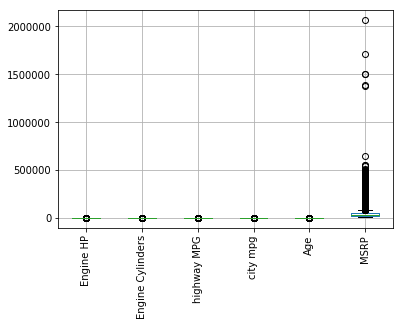

In [28]:
cp = cp[['Engine Fuel Type','Engine HP','Engine Cylinders','Transmission Type','Driven_Wheels',
                  'Number of Doors','Vehicle Size','highway MPG','city mpg','Age','MSRP']]
#check boxplot of continous features
cp.boxplot(column=['Engine HP','Engine Cylinders','highway MPG','city mpg','Age','MSRP'])
plt.xticks(rotation = 90);

In [29]:
###Check outliers for MSRP
Q1 = cp['Engine HP'].quantile(0.25)
Q3 = cp['Engine HP'].quantile(0.75)
IQR = Q3 - Q1
cp = cp[~((cp['Engine HP'] <= (Q1 - (1.5 * IQR))) | (cp['Engine HP'] >= (Q3 + (1.5 * IQR))))]

Q1 = cp['highway MPG'].quantile(0.25)
Q3 = cp['highway MPG'].quantile(0.75)
IQR = Q3 - Q1
cp = cp[~((cp['highway MPG'] <= (Q1 - (1.5 * IQR))) | (cp['highway MPG'] >= (Q3 + (1.5 * IQR))))]

Q1 = cp['city mpg'].quantile(0.25)
Q3 = cp['city mpg'].quantile(0.75)
IQR = Q3 - Q1
cp = cp[~((cp['city mpg'] <= (Q1 - (1.5 * IQR))) | (cp['city mpg'] >= (Q3 + (1.5 * IQR))))]

Q1 = cp['Engine Cylinders'].quantile(0.25)
Q3 = cp['Engine Cylinders'].quantile(0.75)
IQR = Q3 - Q1
cp = cp[~((cp['Engine Cylinders'] <= (Q1 - (1.5 * IQR))) | (cp['Engine Cylinders'] >= (Q3 + (1.5 * IQR))))]

Q1 = cp['Age'].quantile(0.25)
Q3 = cp['Age'].quantile(0.75)
IQR = Q3 - Q1
cp = cp[~((cp['Age'] <= (Q1 - (1.5 * IQR))) | (cp['Age'] >= (Q3 + (1.5 * IQR))))]

Q1 = cp['MSRP'].quantile(0.25)
Q3 = cp['MSRP'].quantile(0.75)
IQR = Q3 - Q1
cp = cp[~((cp['MSRP'] <= (Q1 - (1.5 * IQR))) | (cp['MSRP'] >= (Q3 + (1.5 * IQR))))]
    

cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 0 to 11913
Data columns (total 11 columns):
Engine Fuel Type     8720 non-null float64
Engine HP            8720 non-null float64
Engine Cylinders     8720 non-null float64
Transmission Type    8720 non-null int64
Driven_Wheels        8720 non-null int64
Number of Doors      8720 non-null float64
Vehicle Size         8720 non-null int64
highway MPG          8720 non-null int64
city mpg             8720 non-null int64
Age                  8720 non-null int64
MSRP                 8720 non-null int64
dtypes: float64(4), int64(7)
memory usage: 817.5 KB


In [30]:
cp.to_csv('cp.csv',index=False)

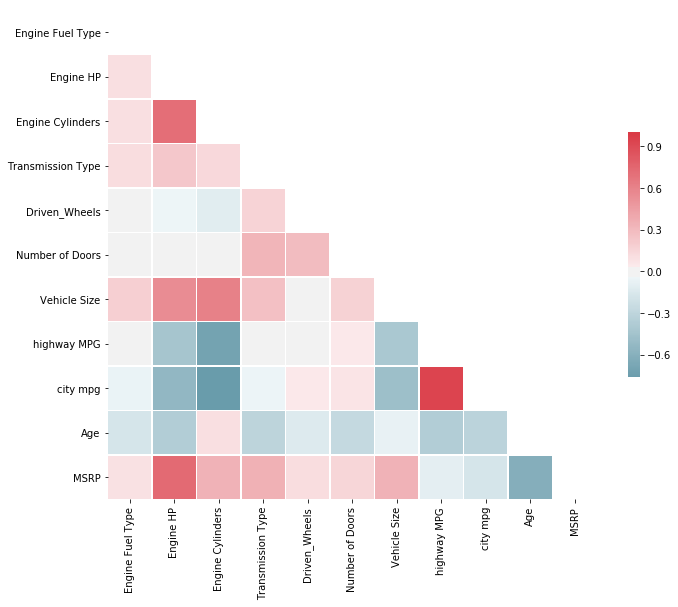

In [31]:
###Data Visualization
#Generate Correlation
corr=cp.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [32]:
corr

,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,highway MPG,city mpg,Age,MSRP
Engine Fuel Type,1.000000,0.101449,0.104000,0.115849,0.011921,0.007221,0.191534,-0.033940,-0.057399,-0.170706,0.087630
Engine HP,0.101449,1.000000,0.715015,0.229980,-0.042120,0.032308,0.549343,-0.432033,-0.536901,-0.356089,0.732723
Engine Cylinders,0.104000,0.715015,1.000000,0.137804,-0.110877,-0.018630,0.611437,-0.704158,-0.761367,0.105773,0.350003
Transmission Type,0.115849,0.229980,0.137804,1.000000,0.163885,0.332564,0.267023,-0.031441,-0.049494,-0.306338,0.354757
Driven_Wheels,0.011921,-0.042120,-0.110877,0.163885,1.000000,0.292844,0.017002,-0.004052,0.053450,-0.131267,0.114429
Number of Doors,0.007221,0.032308,-0.018630,0.332564,0.292844,1.000000,0.177700,0.057149,0.076010,-0.271186,0.153067
Vehicle Size,0.191534,0.549343,0.611437,0.267023,0.017002,0.177700,1.000000,-0.407583,-0.475607,-0.075504,0.346508
highway MPG,-0.033940,-0.432033,-0.704158,-0.031441,-0.004052,0.057149,-0.407583,1.000000,0.935562,-0.356116,-0.094828
city mpg,-0.057399,-0.536901,-0.761367,-0.049494,0.053450,0.076010,-0.475607,0.935562,1.000000,-0.316868,-0.171587
Age,-0.170706,-0.356089,0.105773,-0.306338,-0.131267,-0.271186,-0.075504,-0.356116,-0.316868,1.000000,-0.610561


Here we can see Engine HP is high correlated to MSRP and als Age negatively correlated with MSRP

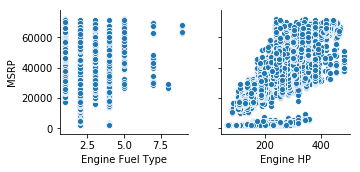

In [33]:
###Plot against MSRP
sns.pairplot(data=cp,
                  y_vars=['MSRP'],
                  x_vars=['Engine Fuel Type', 'Engine HP'])

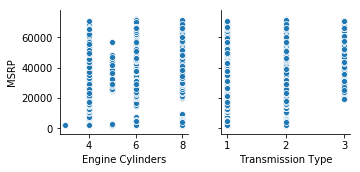

In [34]:
sns.pairplot(data=cp,
                  y_vars=['MSRP'],
                  x_vars=['Engine Cylinders','Transmission Type'])

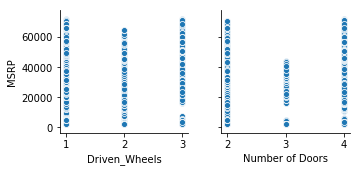

In [35]:
sns.pairplot(data=cp,
                  y_vars=['MSRP'],
                  x_vars=['Driven_Wheels', 'Number of Doors'])

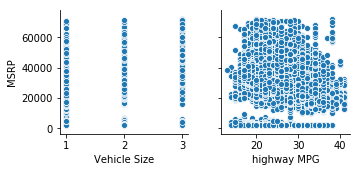

In [36]:
sns.pairplot(data=cp,
                  y_vars=['MSRP'],
                  x_vars=['Vehicle Size','highway MPG',])

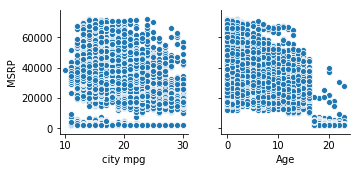

In [37]:
sns.pairplot(data=cp,
                  y_vars=['MSRP'],
                  x_vars=['city mpg','Age'])

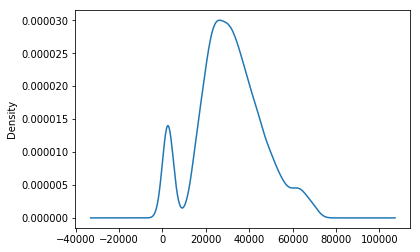

In [38]:
###Distributions
cp['MSRP'].plot(kind='kde')

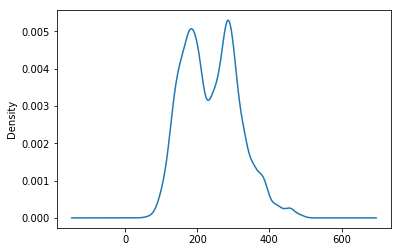

In [39]:
cp['Engine HP'].plot(kind='kde')

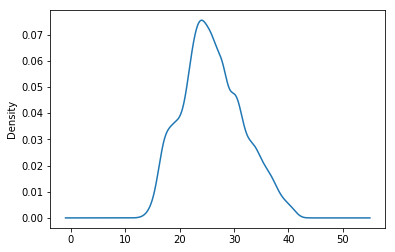

In [40]:
cp['highway MPG'].plot(kind='kde')

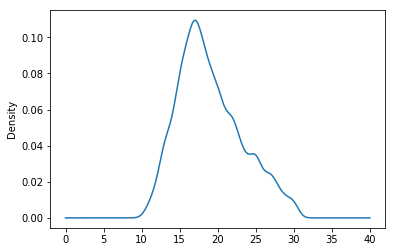

In [41]:
cp['city mpg'].plot(kind='kde')

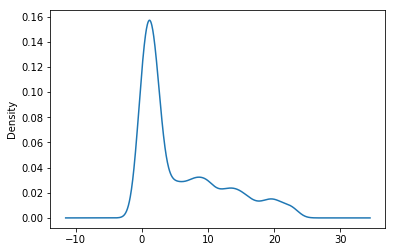

In [42]:
cp['Age'].plot(kind='kde')

In [43]:
# Feature Selection with Univariate Statistical Tests (Chi-squared for regression)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
array = cp.values
X = array[:,0:10]
Y = array[:,10]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[  1930.478 187830.48    2322.363    678.801   1652.321   1067.855
   2049.612   7317.287   5947.257  51796.025]
[[335.  26.  19.   6.]
 [300.  28.  19.   6.]
 [300.  28.  20.   6.]
 [230.  28.  18.   6.]
 [230.  28.  18.   6.]]


With Feature Selection, we choose the best 4 features which are Engine HP, highway MPG, city mpg and Age as they have relationship with MSRP

In [44]:
cp.head()

,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,highway MPG,city mpg,Age,MSRP
0,1.0,335.0,6.0,1,1,2.0,1,26,19,6,46135
1,1.0,300.0,6.0,1,1,2.0,1,28,19,6,40650
2,1.0,300.0,6.0,1,1,2.0,1,28,20,6,36350
3,1.0,230.0,6.0,1,1,2.0,1,28,18,6,29450
4,1.0,230.0,6.0,1,1,2.0,1,28,18,6,34500
